In [1]:
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import numpy as np
from Functions import renormalize, scomplex, plotting, support
import matplotlib.pyplot as plt
import networkx as nx
import powerlaw as pwl
plt.rcParams["text.usetex"] = True

import matplotlib.colors as mcolors

from matplotlib.colors import LinearSegmentedColormap

colors = ["#071C56","#06418F","#2B589F","#5A5389","#7F588D","#533262","#B45389","#D75F78","#FDA599","#A40237"]
colors = colors + colors + colors + colors 
cmap = LinearSegmentedColormap.from_list("my_sas",colors)


## Generate Simplicial Complex

In [29]:
# Network Geometry with Flavor parameters
d = 2
N = 1300
s = 1
beta = 0.1
m = 1

# Number of repetitions
nrep = 1

0


/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


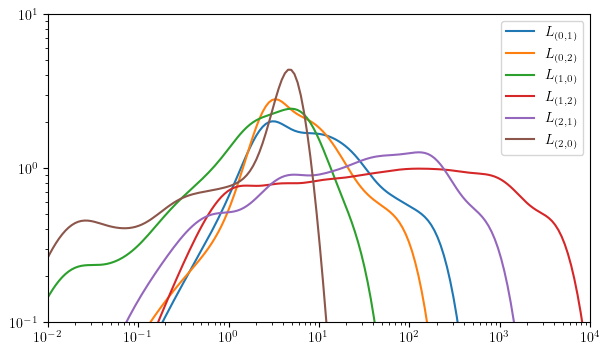

In [34]:
# Define strings which specify the Laplacians to consider
#laplacians_types = ["01","10"]
laplacians_types = ["01","02","10","12","21","20"]


sp_heats = []
for n in range(nrep):
    sc = scomplex.NGF(d,N,s,beta,m)
    print(n)
    Laplacians = []
    for l in laplacians_types:
        L = scomplex.diffusion_laplacian(sc, k=int(l[0]), l=int(l[1]))
        Laplacians.append(L)

    # Compute eigenvalues of the Laplacians and their specific heat curves
    taumin = -3 # Heat curve starts from 10**taumin
    taumax = 4 # Heat curve ends at 10**taumax
    ntau = 200 # Number of taus to consider in the interval

    for i in range(len(Laplacians)):
        L = Laplacians[i]
        D,U = np.linalg.eigh(L)
        specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
        if n == 0:
            sp_heats.append(specific_heat/nrep)
        else:
            sp_heats[i] += specific_heat/nrep


# Plot curves

names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (7,4))
for i in range(len(Laplacians)):
    ax.loglog(tau_space,sp_heats[i])
ax.set_ylim([10**-1,10])
ax.set_xlim([10**-3,10**4])
ax.legend(names)

plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/d{d}s{s}_1rep.png')

## Renormalize

300
274
248
222


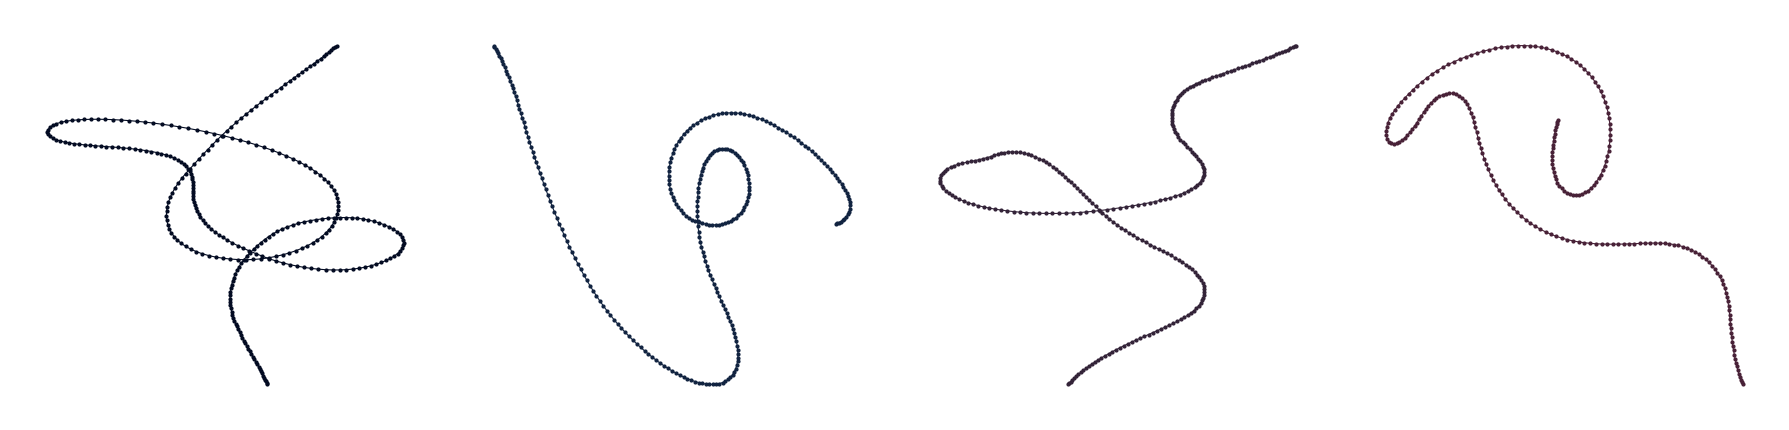

In [113]:
lmax = 4
diff_order = 1
int_order = 0
tau = 50
PLOT = True # Plotting might be very slow
VERBOSE = True

sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, PLOT = PLOT, VERBOSE = VERBOSE, SAVENAME = None)


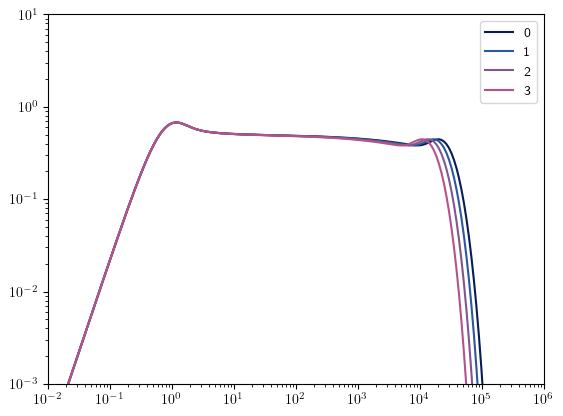

In [115]:
taumin = -2
taumax = 6
ntau = 200

for i in range(lmax):
    scc = sequence[i]
    Lnew = scomplex.diffusion_laplacian(scc, diff_order, int_order)

    Dnew, Unew = np.linalg.eigh(Lnew)
    specific_heat,tau_space, __ = renormalize.compute_heat(Dnew,taumin,taumax,ntau)
    plt.loglog(tau_space,specific_heat,color = colors[2*i])

plt.ylim([10**-3,10**1])
plt.xlim([10**taumin,10**taumax])
plt.legend([i for i in range(lmax)])